Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: >

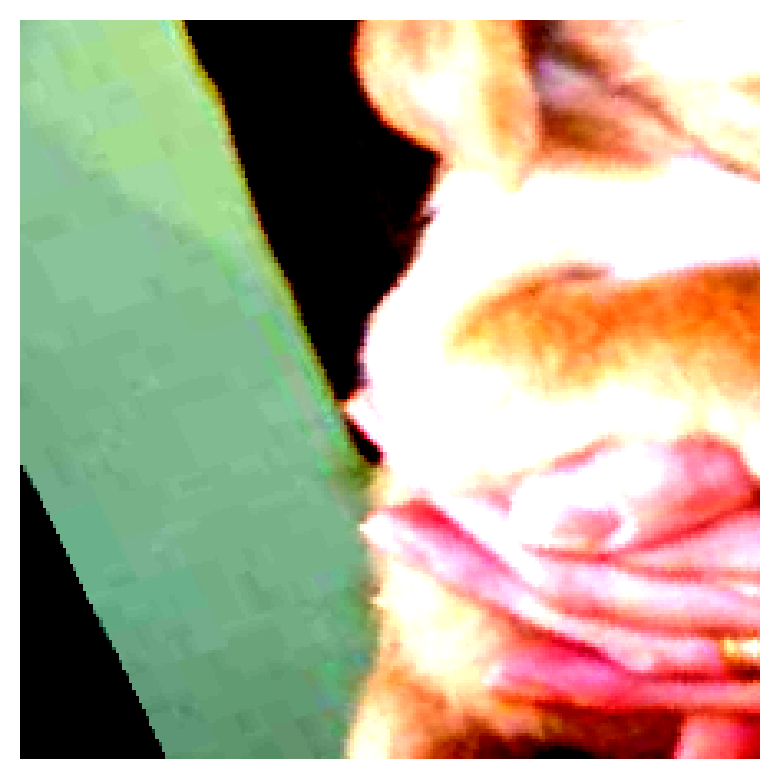

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from utils_projects import imshow

data_dir = '../data/Cat_Dog_data'

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

# Run this to test the data loader
images, labels = next(iter(trainloader))
imshow(images[0], normalize=False)

In [38]:
model = models.resnet50(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 512)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(p=0.2)),
                          ('fc2', nn.Linear(512, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.fc = classifier
model

C:\Users\hychy\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hychy\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [39]:
#import time

criterion = nn.NLLLoss()
# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 30

for e in range(epochs):
    running_loss = 0
    for inputs, labels in trainloader:

        #print(inputs.shape)
        #inputs = torch.squeeze( inputs.reshape( ( inputs.shape[0], inputs.shape[1], int(inputs.numel()/(inputs.shape[0]*inputs.shape[1])) ) ) )

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        #start = time.time()

        #print(inputs.size())
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    
        #if torch.fmod(torch.tensor([ii]), 100) == torch.tensor([0]):
            #print(f"{ii+1}/{len(trainloader)}") 
            #pass
    
    print(f"Training loss: {running_loss/len(trainloader): .3f}")



Training loss:  0.200
Training loss:  0.150
Training loss:  0.143
Training loss:  0.140
Training loss:  0.144
Training loss:  0.141
Training loss:  0.141
Training loss:  0.140
Training loss:  0.137
Training loss:  0.131
Training loss:  0.132
Training loss:  0.136
Training loss:  0.132
Training loss:  0.129
Training loss:  0.128
Training loss:  0.129
Training loss:  0.133
Training loss:  0.128
Training loss:  0.130
Training loss:  0.127
Training loss:  0.124
Training loss:  0.131
Training loss:  0.120
Training loss:  0.125
Training loss:  0.126
Training loss:  0.123
Training loss:  0.127
Training loss:  0.133
Training loss:  0.129
Training loss:  0.123
